In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
import datetime as dt
import matplotlib.pyplot as plt

# get_summary

Fa una come GridSearchCV ma ritorna tutti i risultati in un dataframe.

In [2]:
def get_summary(X, y):
    activations = ['relu', 'logistic', 'tanh']
    hidden_layers = [(2), (3,3), (5), (6,3), (5,5),(6), (8), (10), (2,2,2)]

    summary = {"Activation" : [], "Hidden layer sizes" : [], "Scores" : [], "Mean score" : [], "Scores std" : []}

    for activation in activations:
        for hidden_layer in hidden_layers:
            mlp = MLPClassifier(activation=activation, hidden_layer_sizes=hidden_layer, learning_rate_init=0.001, max_iter=5000, learning_rate="adaptive")

            scores = cross_val_score(mlp, X, y)

            summary["Scores"].append(list(map(lambda x : round(x, 3), scores)))
            summary["Mean score"].append(round(scores.mean(), 3))
            summary["Scores std"].append(round(scores.std(), 3))
            summary["Activation"].append(activation)
            summary["Hidden layer sizes"].append(hidden_layer)

    summ = pd.DataFrame(summary)
    return summ.sort_values('Mean score', ascending=False)

In [3]:
df = pd.read_excel('data/IncidentiModificato.xlsx')
df.DATA = df.DATA.apply(lambda d: (d - dt.datetime(1970,1,1)).days)

X = df[['SESSO', 'ANNI', 'PESO', 'ALTEZZA', 'BMI', 'Tot Testa', 'Tot Torace', 'Tot Addome', 'Tot Scheletro']]
y = df['Mezzo']

sc = StandardScaler()
X_std = sc.fit_transform(X)

get_summary(X_std, y)

,Activation,Hidden layer sizes,Scores,Mean score,Scores std
14,logistic,6,"[0.654, 0.769, 0.808, 0.808, 0.538]",0.715,0.105
11,logistic,5,"[0.654, 0.769, 0.769, 0.769, 0.538]",0.700,0.092
5,relu,6,"[0.577, 0.808, 0.846, 0.692, 0.5]",0.685,0.132
18,tanh,2,"[0.615, 0.846, 0.577, 0.769, 0.577]",0.677,0.110
6,relu,8,"[0.615, 0.846, 0.692, 0.654, 0.577]",0.677,0.093
15,logistic,8,"[0.654, 0.692, 0.808, 0.692, 0.5]",0.669,0.099
9,logistic,2,"[0.615, 0.692, 0.769, 0.769, 0.5]",0.669,0.102
26,tanh,"(2, 2, 2)","[0.577, 0.731, 0.808, 0.538, 0.615]",0.654,0.100
2,relu,5,"[0.654, 0.731, 0.615, 0.692, 0.577]",0.654,0.054
1,relu,"(3, 3)","[0.615, 0.769, 0.615, 0.654, 0.577]",0.646,0.066


# PCA sulle parti del corpo invece che una somma

Sembra andare leggermente meglio

In [31]:
from sklearn.decomposition import PCA
pd.options.mode.chained_assignment = None  # default='warn'

X_pca = df[['SESSO', 'ANNI', 'PESO', 'ALTEZZA','BMI']]

for parte_corpo in ['Testa', 'Torace', 'Addome', 'Scheletro']:
    pca = PCA(n_components=1).fit_transform(df.filter(regex=parte_corpo+":"))
    X_pca['PCA ' + parte_corpo] = pca
    
X_pca_std = StandardScaler().fit_transform(X_pca)

get_summary(X_pca_std, y)

,Activation,Hidden layer sizes,Scores,Mean score,Scores std
11,logistic,5,"[0.577, 0.769, 0.846, 0.769, 0.577]",0.708,0.110
22,tanh,"(5, 5)","[0.654, 0.692, 0.808, 0.692, 0.654]",0.700,0.057
15,logistic,8,"[0.577, 0.769, 0.846, 0.731, 0.577]",0.700,0.107
14,logistic,6,"[0.577, 0.769, 0.808, 0.769, 0.577]",0.700,0.101
16,logistic,10,"[0.577, 0.692, 0.808, 0.769, 0.577]",0.685,0.095
26,tanh,"(2, 2, 2)","[0.538, 0.769, 0.846, 0.654, 0.577]",0.677,0.116
23,tanh,6,"[0.731, 0.615, 0.654, 0.692, 0.615]",0.662,0.045
7,relu,10,"[0.538, 0.731, 0.769, 0.654, 0.577]",0.654,0.088
12,logistic,"(6, 3)","[0.538, 0.538, 0.846, 0.769, 0.538]",0.646,0.134
18,tanh,2,"[0.5, 0.692, 0.731, 0.731, 0.577]",0.646,0.092


## Accuracy del miglior stimatore con una cross validation annidata

Questa procedura ci conferma che avere come funzione di attivazione la logistic e un solo strato nascosto con 6 neuroni sia una buona idea.

In [5]:
from sklearn.model_selection import GridSearchCV

params = {
    'activation': ['relu', 'logistic', 'tanh'],
    'hidden_layer_sizes' : [(2), (3,3), (5), (6,3), (5,5),(6), (8), (10)]
}

mlp = MLPClassifier(learning_rate_init=0.001, max_iter=5000, learning_rate="adaptive")

clf = GridSearchCV(mlp, params, n_jobs=-1, cv=5)

scores = cross_val_score(clf, X_pca_std, y, cv=5)
print("\nAccuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy: 0.64 (+/- 0.20)


In [6]:
clf.fit(X_pca_std, y)
clf.best_estimator_

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=8, learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=5000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

# Riduco tutti i dati con TSNE a due dimensioni

Dopo un po' di test ho scoperto che questa procedura migliori leggermente le prestazioni.

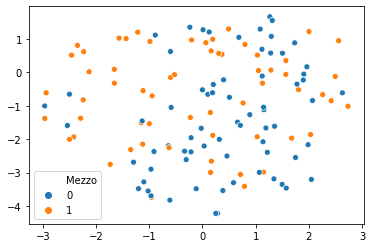

In [7]:
from sklearn.manifold import TSNE
import seaborn as sns

X_tsne = TSNE(perplexity=70, method='exact', n_components=2).fit_transform(X_pca_std)
sns.scatterplot(X_tsne[:,0], X_tsne[:,1], hue=y)
plt.show()

In [8]:
get_summary(X_tsne,y)

,Activation,Hidden layer sizes,Scores,Mean score,Scores std
16,logistic,10,"[0.692, 0.538, 0.692, 0.885, 0.5]",0.662,0.136
19,tanh,"(3, 3)","[0.654, 0.731, 0.615, 0.731, 0.538]",0.654,0.073
21,tanh,"(6, 3)","[0.654, 0.692, 0.615, 0.808, 0.5]",0.654,0.100
26,tanh,"(2, 2, 2)","[0.654, 0.731, 0.615, 0.808, 0.423]",0.646,0.130
2,relu,5,"[0.538, 0.731, 0.615, 0.808, 0.538]",0.646,0.107
23,tanh,6,"[0.654, 0.654, 0.615, 0.808, 0.5]",0.646,0.099
22,tanh,"(5, 5)","[0.577, 0.692, 0.577, 0.808, 0.538]",0.638,0.099
15,logistic,8,"[0.654, 0.692, 0.615, 0.731, 0.5]",0.638,0.079
4,relu,"(5, 5)","[0.5, 0.731, 0.654, 0.769, 0.5]",0.631,0.113
25,tanh,10,"[0.5, 0.692, 0.615, 0.808, 0.5]",0.623,0.118


# Cross validation annidata anche ai dati con TSNE

Ci conferma che fa leggermente meglio, logicamente avendo cambiato le dimensionalità dei dati gli iperparametri del miglior classificatore non sono più simili a quelli trovati prima.

In [9]:
from sklearn.model_selection import GridSearchCV

params = {
    'activation': ['relu', 'logistic', 'tanh'],
    'hidden_layer_sizes' : [(2), (3,3), (5), (6,3), (5,5),(6), (8), (10)]
}

mlp = MLPClassifier(learning_rate_init=0.001, max_iter=5000, learning_rate="adaptive")

clf = GridSearchCV(mlp, params, n_jobs=-1, cv=5)

scores = cross_val_score(clf, X_tsne, y, cv=5)
print("\nAccuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy: 0.60 (+/- 0.17)


In [10]:
clf.fit(X_tsne, y)
clf.best_score_

0.6615384615384615

In [11]:
clf.best_estimator_

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=10, learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=5000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

# Over sampling con SMOTE

SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.

Specifically, a random example from the minority class is first chosen. Then k of the nearest neighbors for that example are found (typically k=5). A randomly selected neighbor is chosen and a synthetic example is created at a randomly selected point between the two examples in feature space.

https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

In [12]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(sampling_strategy={0 : 500, 1 : 500})
X_os, y_os = smote.fit_resample(X, y) 

X_os_std = StandardScaler().fit_transform(X_os)

E:\anaconda3\lib\site-packages\imblearn\utils\_validation.py:324: UserWarning: After over-sampling, the number of samples (500) in class 0 will be larger than the number of samples in the majority class (class #0 -> 70)
  n_samples_majority,
E:\anaconda3\lib\site-packages\imblearn\utils\_validation.py:324: UserWarning: After over-sampling, the number of samples (500) in class 1 will be larger than the number of samples in the majority class (class #0 -> 70)
  n_samples_majority,


Controllo che non abbia semplicemente duplicato alcuni dati, mi era successo provando con `RandomOverSampler` sempre di `imblearn.over_sampling`: 

In [13]:
len(X_os.drop_duplicates())

1000

In [14]:
Counter(y)

Counter({0: 70, 1: 60})

In [15]:
Counter(y_os)

Counter({0: 500, 1: 500})

In [16]:
X_os.head()

,SESSO,ANNI,PESO,ALTEZZA,BMI,Tot Testa,Tot Torace,Tot Addome,Tot Scheletro
0,0,81,84.0,1.75,27.428571,2,0,3,9
1,1,69,69.0,1.62,26.291724,20,7,1,4
2,1,71,67.0,1.55,27.887617,6,0,0,4
3,1,54,60.0,1.59,23.733238,5,3,2,4
4,1,78,69.0,1.67,24.740937,2,0,2,4


# Testo la rete che sembrava la più promettente con i dati aumentati

Sembra esserci effettivamente un incremento di accuracy

In [17]:
my_mlp = MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=6, learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=5000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

scores = cross_val_score(my_mlp, X_os_std, y_os, cv=5)
print("\nAccuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy: 0.80 (+/- 0.06)


L'aumento dei dati sembra aver rispettato bene la distribuzione dei dati, ancora devo approfondire questa parte. Per ora mi sono limitato a guardare questi grafici e compararli con quelli del dataset senza oversampling.

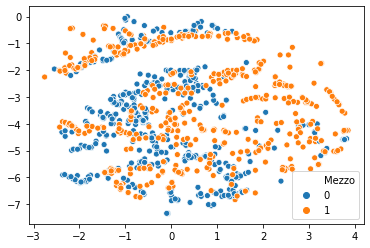

In [18]:
X_tsne = TSNE(perplexity=500).fit_transform(X_os_std)
sns.scatterplot(X_tsne[:,0], X_tsne[:,1], hue=y_os)
plt.show()

Per curiosità ho guardato come se la cavano altre reti, quella che sembrava la più promettente prima ora è scesa un po' in classifica.

In [20]:
X_os, y_os = smote.fit_resample(X, y) 
X_os_std = StandardScaler().fit_transform(X_os)

get_summary(X_os, y_os) #dati non standardizzati

E:\anaconda3\lib\site-packages\imblearn\utils\_validation.py:324: UserWarning: After over-sampling, the number of samples (500) in class 0 will be larger than the number of samples in the majority class (class #0 -> 70)
  n_samples_majority,
E:\anaconda3\lib\site-packages\imblearn\utils\_validation.py:324: UserWarning: After over-sampling, the number of samples (500) in class 1 will be larger than the number of samples in the majority class (class #0 -> 70)
  n_samples_majority,


,Activation,Hidden layer sizes,Scores,Mean score,Scores std
16,logistic,10,"[0.86, 0.855, 0.91, 0.86, 0.87]",0.871,0.020
15,logistic,8,"[0.815, 0.845, 0.835, 0.805, 0.83]",0.826,0.014
25,tanh,10,"[0.825, 0.845, 0.835, 0.8, 0.825]",0.826,0.015
23,tanh,6,"[0.815, 0.82, 0.85, 0.81, 0.815]",0.822,0.014
24,tanh,8,"[0.795, 0.865, 0.815, 0.81, 0.785]",0.814,0.028
14,logistic,6,"[0.795, 0.84, 0.805, 0.75, 0.83]",0.804,0.032
21,tanh,"(6, 3)","[0.72, 0.855, 0.83, 0.76, 0.79]",0.791,0.048
12,logistic,"(6, 3)","[0.835, 0.875, 0.84, 0.5, 0.835]",0.777,0.139
13,logistic,"(5, 5)","[0.79, 0.525, 0.83, 0.78, 0.805]",0.746,0.112
2,relu,5,"[0.68, 0.805, 0.755, 0.75, 0.71]",0.740,0.043


In [21]:
get_summary(X_os_std, y_os) #dati non standardizzati

,Activation,Hidden layer sizes,Scores,Mean score,Scores std
25,tanh,10,"[0.885, 0.92, 0.925, 0.895, 0.915]",0.908,0.015
21,tanh,"(6, 3)","[0.825, 0.91, 0.885, 0.91, 0.905]",0.887,0.032
7,relu,10,"[0.805, 0.925, 0.87, 0.905, 0.875]",0.876,0.041
24,tanh,8,"[0.83, 0.895, 0.915, 0.855, 0.87]",0.873,0.030
22,tanh,"(5, 5)","[0.81, 0.895, 0.875, 0.85, 0.89]",0.864,0.031
6,relu,8,"[0.805, 0.86, 0.905, 0.89, 0.84]",0.860,0.036
16,logistic,10,"[0.84, 0.875, 0.835, 0.825, 0.9]",0.855,0.028
3,relu,"(6, 3)","[0.805, 0.87, 0.855, 0.87, 0.785]",0.837,0.035
4,relu,"(5, 5)","[0.815, 0.87, 0.83, 0.79, 0.875]",0.836,0.032
23,tanh,6,"[0.79, 0.855, 0.855, 0.815, 0.855]",0.834,0.027


# Test con diverse numerosità di dati con la funzione migliore di prima

In [28]:
import warnings
warnings.filterwarnings("ignore")

for n_data in [200,500,1000,5000, 10000]:
    smote = SMOTE(sampling_strategy={0 : int(n_data/2), 1 : int(n_data/2)})
    X_os, y_os = smote.fit_resample(X, y) 

    X_os_std = StandardScaler().fit_transform(X_os)

    my_mlp = MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
                  beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
                  hidden_layer_sizes=6, learning_rate='adaptive',
                  learning_rate_init=0.001, max_fun=15000, max_iter=5000,
                  momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
                  power_t=0.5, random_state=None, shuffle=True, solver='adam',
                  tol=0.0001, validation_fraction=0.1, verbose=False,
                  warm_start=False)

    scores = cross_val_score(my_mlp, X_os_std, y_os, cv=5)
    print("\nAccuracy with n_data = %d: %0.2f (+/- %0.2f)" % (n_data, scores.mean(), scores.std() * 2))


Accuracy with n_data = 200: 0.73 (+/- 0.10)

Accuracy with n_data = 500: 0.77 (+/- 0.08)

Accuracy with n_data = 1000: 0.77 (+/- 0.07)

Accuracy with n_data = 5000: 0.85 (+/- 0.02)

Accuracy with n_data = 10000: 0.86 (+/- 0.05)


In [26]:
def add_new_elements(error_distrib,n_elements,n_columns,dataset,\
                     label_col):
    
    x = error_distrib['x']
    px = error_distrib['px']
    
    count_elements = 0
    
    df_result = dataset
    
    eq_freq = []
    count_neq_label = 0
    
    while True:
        #Scelta elemento da cui partire
        from_item = np.random.choice(dataset.index)
        elem = dataset[dataset.index==from_item]
        new_index = ['F'+str(ind) for ind in list(elem.index)]
        elem.rename({from_item:'FAKE'+str(from_item)},inplace=True)
        
        
        #scelta colonne da perturbare
        columns = set()
        columns_to_extract = list(set(dataset.columns)-set([label_col]))
        while(len(columns)!=n_columns):
            extract = np.random.choice(columns_to_extract)
            columns.add(extract)
            columns_to_extract = list(set(columns_to_extract)-set([extract]))
        columns_list = list(columns)
        
                       
        #perturbazione
        for col in columns_list:
            #check rimanga in valori del dominio
            while True:
                perturbation = np.random.choice(x,p=px)
                new_value = elem.iloc[0][col]+perturbation
                if new_value >= 0 and new_value<=4: break
            elem[col]=new_value
        
        #check elementi uguali
        eq_list = [x for x,y in dataset.iterrows() if all(y==elem.iloc[0])]
        if len(eq_list)>0:
            eq_item = eq_list[0]
            eq_label = elem.iloc[0][label_col]\
                        == dataset.loc[eq_item][label_col] 
            eq_freq.append(count_elements)
            if not eq_label:
                count_neq_label+=1
            """
            warn("Creato un elemento già presente"+\
                " ho perturbato {} colonne".format(n_columns)+\
                " ho già creato {} elementi".format(count_elements)+\
                " px: {}".format(px)+\
                " label uguali: {}".format(eq_label))
            """
        else:
            count_elements+=1
            df_result = df_result.append(elem)
        
        if count_elements==n_elements: break
            
    return df_result,eq_freq,count_neq_label


In [33]:
#error_distrib = {'x' : [-2,-1,0,1,2], 'px' : [0.1,0.2,0.4,0.1,0.2]}
#X_pca_augmented = add_new_elements(error_distrib, 500, 3, X_pca, 'Mezzo')

[256, 512, 1024, 2048, 4096, 8192, 16384, 32768]

In [39]:
4/2

2.0